In [3]:
import os
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [4]:
NLTK_DATA_DIR = "/Users/shivansh420/Desktop/MMDP-2_Dataset/Task-3/Task-C/nltk_data"  # e.g. "/Users/username/anaconda3/lib/python3.10/site-packages/nltk_data"
ANTHEM_DIR = "/Users/shivansh420/Desktop/MMDP-2_Dataset/Task-3/Task-A/translations"  
# If you have an output folder for results, define it here as well
OUTPUT_DIR = "/Users/shivansh420/Desktop/MMDP-2_Dataset/Task-3/Task-C"
os.makedirs(OUTPUT_DIR, exist_ok=True)
# Download required NLTK data (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shivansh420/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shivansh420/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
texts = []

# Load all text files in the anthem translations folder
for file in os.listdir(ANTHEM_DIR):
    if file.lower().endswith(".txt"):
        path = os.path.join(ANTHEM_DIR, file)
        with open(path, "r", encoding="utf-8") as f:
            content = f.read()
            texts.append(content)

# Combine all translations into a single text corpus
corpus = " ".join(texts)
print("Corpus length (characters):", len(corpus))

# Convert to lowercase and remove punctuation
corpus = corpus.lower()
corpus = corpus.translate(str.maketrans("", "", string.punctuation))

# Tokenize and remove stop words
tokens = word_tokenize(corpus)
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token not in stop_words and token.isalpha()]

print("Total tokens after cleaning:", len(filtered_tokens))

Corpus length (characters): 53753
Total tokens after cleaning: 5282


Most common words: [('chorus', 93), ('us', 76), ('land', 69), ('let', 52), ('freedom', 44), ('free', 43), ('may', 42), ('people', 40), ('god', 38), ('live', 34), ('glory', 34), ('one', 34), ('country', 31), ('peace', 30), ('sons', 28), ('ever', 28), ('thee', 28), ('liberty', 27), ('love', 26), ('homeland', 26)]


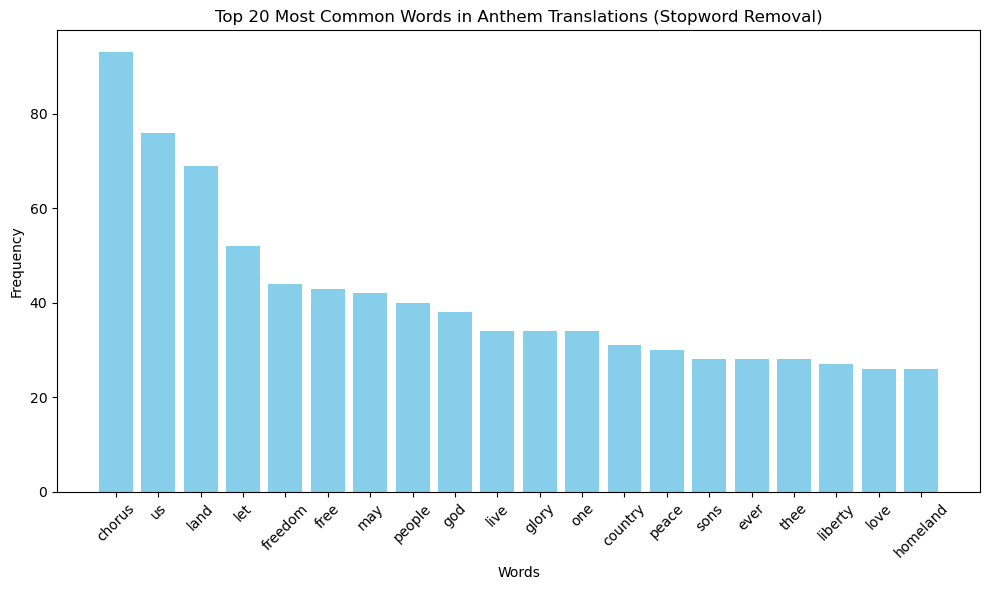

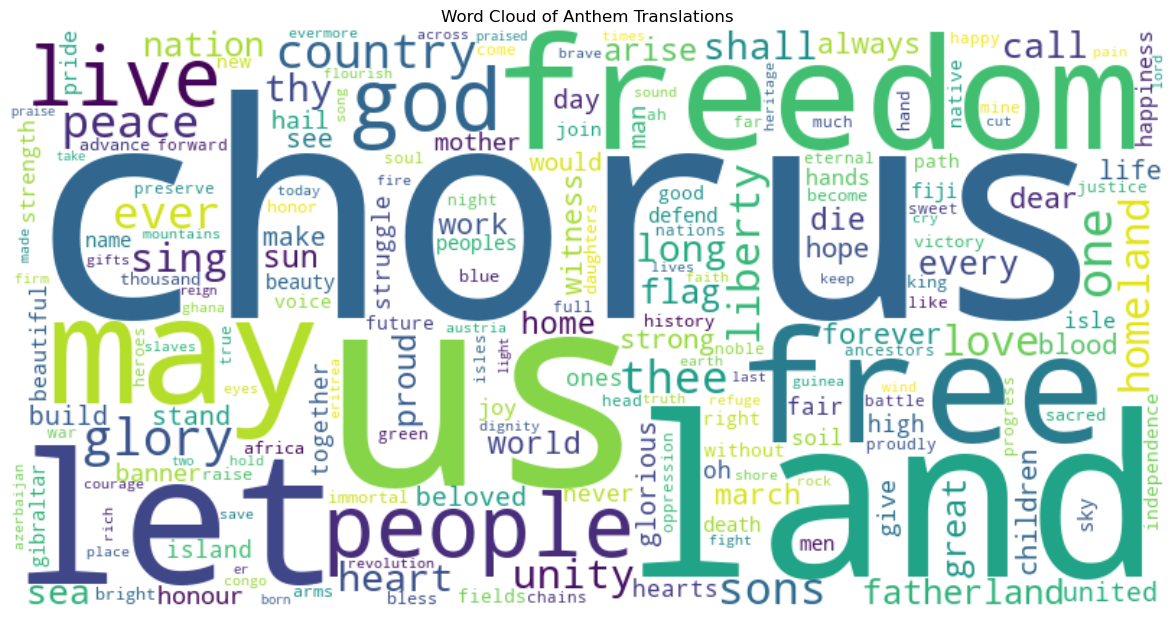

Bar plot saved to /Users/shivansh420/Desktop/MMDP-2_Dataset/Task-3/Task-C/anthem_barplot.png
Word cloud saved to /Users/shivansh420/Desktop/MMDP-2_Dataset/Task-3/Task-C/anthem_wordcloud.png


In [6]:
# %% Cell 2: Text Analysis and Visualization

import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

# Compute frequency distribution
freq_dist = Counter(filtered_tokens)
most_common = freq_dist.most_common(20)
print("Most common words:", most_common)

# Create a bar plot of the top 20 words
words, counts = zip(*most_common)
plt.figure(figsize=(10,6))
plt.bar(words, counts, color='skyblue')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Common Words in Anthem Translations (Stopword Removal)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Generate and display a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Anthem Translations")
plt.show()

# (Optional) Save figures to OUTPUT_DIR if desired
barplot_path = os.path.join(OUTPUT_DIR, "anthem_barplot.png")
plt.figure(figsize=(10,6))
plt.bar(words, counts, color='skyblue')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Common Words in Anthem Translations (Stopword Removal)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(barplot_path)
plt.close()
print(f"Bar plot saved to {barplot_path}")

wordcloud_path = os.path.join(OUTPUT_DIR, "anthem_wordcloud.png")
wc_figure = plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Anthem Translations")
wc_figure.savefig(wordcloud_path)
plt.close()
print(f"Word cloud saved to {wordcloud_path}")


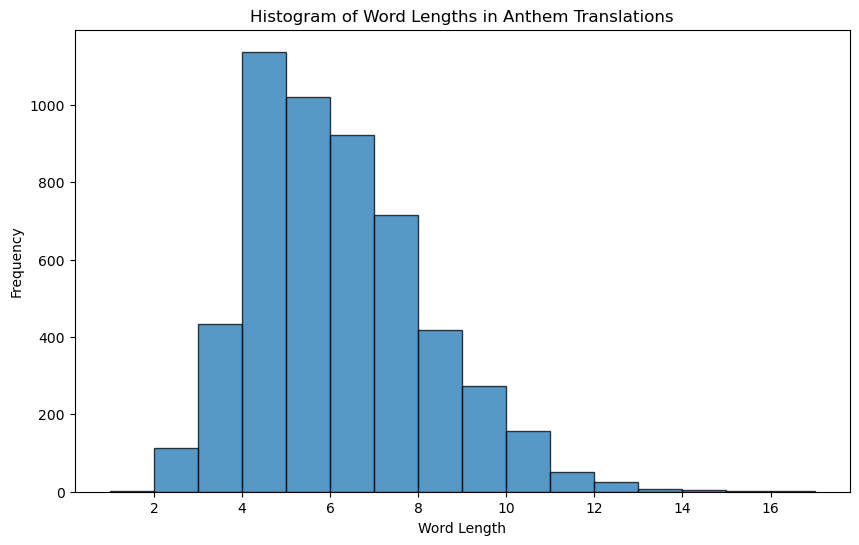

In [7]:
# %% Cell: Histogram of Word Lengths in Anthem Translations
import matplotlib.pyplot as plt

# Compute word lengths for each token in filtered_tokens
word_lengths = [len(word) for word in filtered_tokens]

plt.figure(figsize=(10,6))
plt.hist(word_lengths, bins=range(1, max(word_lengths) + 2), edgecolor='black', alpha=0.75)
plt.xlabel("Word Length")
plt.ylabel("Frequency")
plt.title("Histogram of Word Lengths in Anthem Translations")
plt.show()


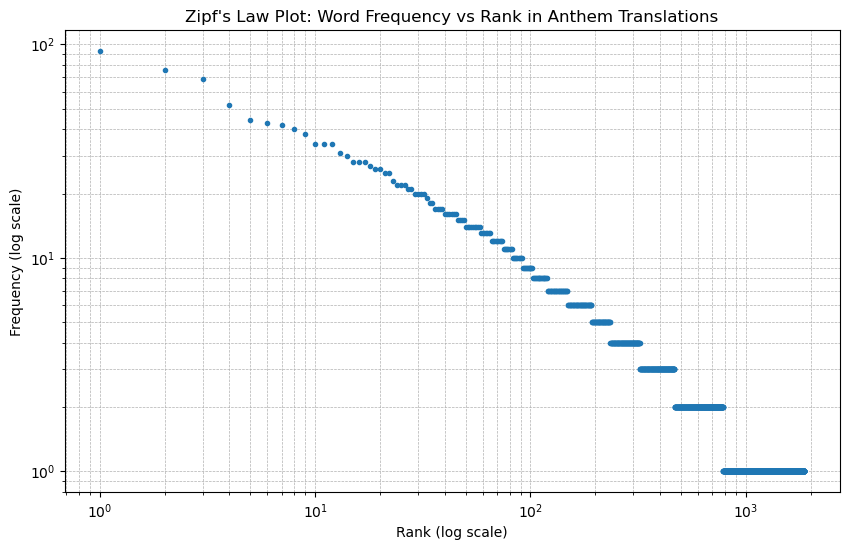

In [8]:
# %% Cell: Zipf's Law Plot
# Create a sorted list of (word, frequency) tuples in descending order
freq_sorted = sorted(freq_dist.items(), key=lambda x: x[1], reverse=True)
ranks = range(1, len(freq_sorted) + 1)
frequencies = [item[1] for item in freq_sorted]

plt.figure(figsize=(10,6))
plt.loglog(ranks, frequencies, marker=".", linestyle="none")
plt.xlabel("Rank (log scale)")
plt.ylabel("Frequency (log scale)")
plt.title("Zipf's Law Plot: Word Frequency vs Rank in Anthem Translations")
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()


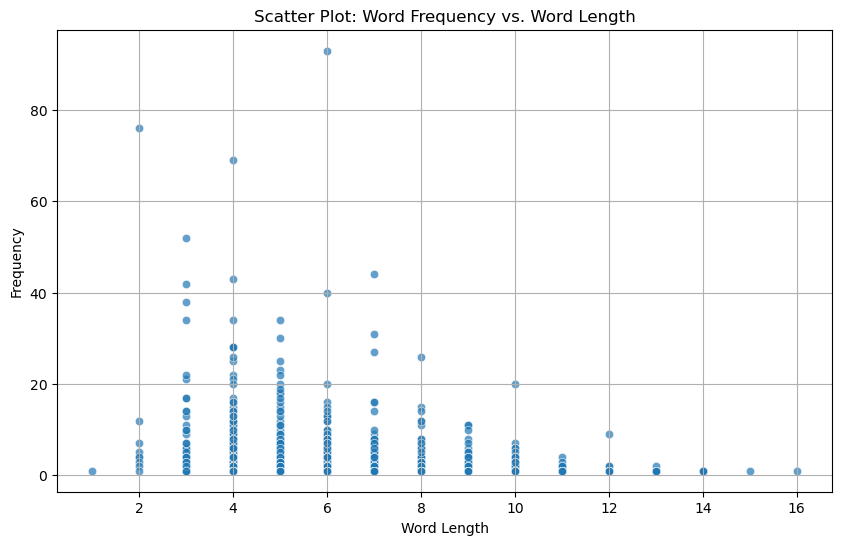

In [9]:
# %% Cell: Scatter Plot: Word Frequency vs. Word Length
import seaborn as sns
import pandas as pd

# Create a DataFrame from the frequency distribution
word_data = pd.DataFrame(list(freq_dist.items()), columns=["Word", "Frequency"])
word_data["Length"] = word_data["Word"].apply(len)

plt.figure(figsize=(10,6))
sns.scatterplot(data=word_data, x="Length", y="Frequency", alpha=0.7)
plt.xlabel("Word Length")
plt.ylabel("Frequency")
plt.title("Scatter Plot: Word Frequency vs. Word Length")
plt.grid(True)
plt.show()


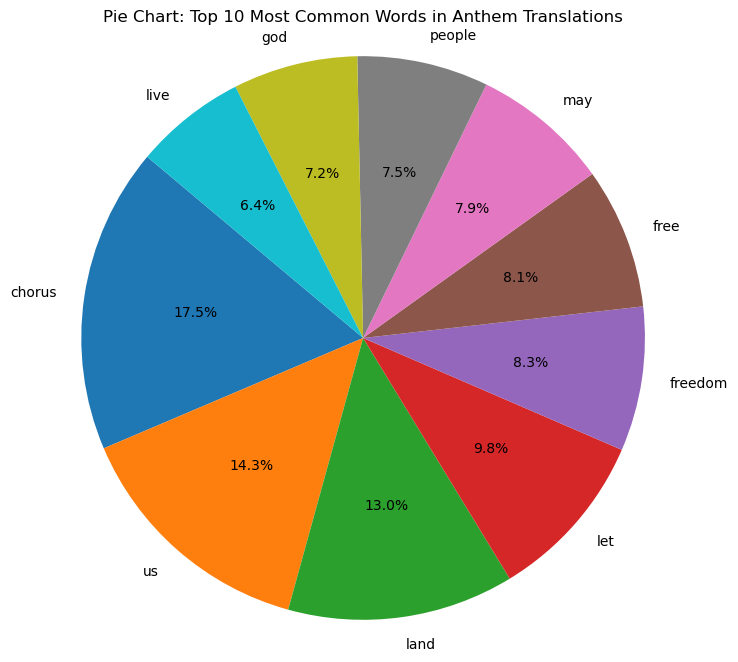

In [10]:
# %% Cell: Pie Chart of Top 10 Most Common Words
top10 = freq_dist.most_common(10)
labels, sizes = zip(*top10)

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140)
plt.title("Pie Chart: Top 10 Most Common Words in Anthem Translations")
plt.axis("equal")
plt.show()
